Problem #1

In [ ]:
import numpy as np
np.set_printoptions(precision=3, suppress = True)

d_model = 8
max_positions = 4

position_enc = np.zeros((max_positions,d_model))

for pos in range (max_positions):
  for i in range (d_model):
    position_enc[pos,i] = np.array(pos/np.power(10000, 2*i / d_model))

In [ ]:
position_enc_sin_cosine = np.zeros((max_positions, d_model))

position_enc_sin_cosine[1:, 0::2] = np.sin(position_enc[1:, 0::2])
position_enc_sin_cosine[1:, 1::2] = np.cos(position_enc[1:, 1::2])

print(position_enc_sin_cosine)

[[0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.841 0.995 0.01  1.    0.    1.    0.    1.   ]
 [0.909 0.98  0.02  1.    0.    1.    0.    1.   ]
 [0.141 0.955 0.03  1.    0.    1.    0.    1.   ]]


In [ ]:
from scipy.spatial.distance import cosine
pos1 = position_enc_sin_cosine[1]
pos3 = position_enc_sin_cosine[3]

print(f'Cosine distance with positional embeddings') 
print('p1->p3')
print(cosine(pos1, pos3))

Cosine distance with positional embeddings
p1->p3
0.053330553292434746


Problem #2

In [ ]:
from scipy import special

In [ ]:
word_1 = np.array([1, 0, 1, 0])
word_2 = np.array([0, 2, 2, 2])
word_3 = np.array([1, 1, 1, 1])

W_Q = np.array([[0, 0, 1],
[1, 1, 0],
[0, 1, 0],
[1, 1, 0]])

W_K = np.array([[1, 0, 1],
[1, 0, 0],
[0, 1, 0],
[1, 0, 1]])

W_V = np.array([[1, 0, 1],
[1, 1, 0],
[0, 1, 1],
[0, 0, 1]])

In [ ]:
Q = np.dot( np.array((word_1, word_2, word_3)), W_Q)
K = np.dot(np.array((word_1, word_2, word_3)), W_K)
V = np.dot(np.array((word_1, word_2, word_3)), W_V)

In [ ]:
attn_scores = np.dot(Q, K.transpose())

In [ ]:
normalized_attn_scores = attn_scores / K.shape[1] ** 0.5

In [ ]:
attn_scores_softmax = special.softmax(normalized_attn_scores, axis=1)

In [ ]:
attn_output = np.dot(attn_scores_softmax, V)

In [ ]:
print('Attention Vector')
print(attn_output)

Attention Vector
[[1.832 2.898 3.365]
 [2.    3.994 3.997]
 [1.997 3.886 3.941]]


Problem #3

In [ ]:
! pip install transformers
! pip install git+https://github.com/huggingface/transformers.git

In [ ]:
from transformers import pipeline

In [ ]:
#Problem 3.1
classifier = pipeline('sentiment-analysis')

In [ ]:
classifier('I like NLP course.')

[{'label': 'POSITIVE', 'score': 0.9993118047714233}]

In [ ]:
classifier('I hate when my computer crasehs.')

[{'label': 'NEGATIVE', 'score': 0.9993535876274109}]

In [ ]:
#Problem 3.2
classifier = pipeline('zero-shot-classification')

In [ ]:
classifier('Los Angeles Clipper is a good basketball team', candidate_labels=['sports', 'politics', 'education'],)


{'sequence': 'Los Angeles Clipper is a good basketball team',
 'labels': ['sports', 'education', 'politics'],
 'scores': [0.9973015189170837, 0.0016447460511699319, 0.0010537264170125127]}

In [ ]:
#Problem 3.3
gen = pipeline('text-generation')

In [ ]:
gen('In this month, the stock market will')

/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1201: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.9/dist-packages/transformers/generation/utils.py:1288: UserWarning: Using `max_length`'s default (50) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': "In this month, the stock market will be gripped by high volatility, not yet fully recovered. Even if it recovers, it won't be enough."}]

In [ ]:
#Problem 3.4
gen = pipeline('fill-mask')

In [ ]:
gen('Math course will teach you about <mask> topics.', top_k=2)

[{'score': 0.11557416617870331,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'Math course will teach you about mathematical topics.'},
 {'score': 0.0893840342760086,
  'token': 10638,
  'token_str': ' math',
  'sequence': 'Math course will teach you about math topics.'}]

In [ ]:
#Problem 3.5
gen = pipeline('ner',grouped_entities=True)

In [ ]:
gen('Tim Cook is the CEO of Apple located in San Jose.')

[{'entity_group': 'PER',
  'score': 0.9997417,
  'word': 'Tim Cook',
  'start': 0,
  'end': 8},
 {'entity_group': 'ORG',
  'score': 0.99871206,
  'word': 'Apple',
  'start': 23,
  'end': 28},
 {'entity_group': 'LOC',
  'score': 0.9983774,
  'word': 'San Jose',
  'start': 40,
  'end': 48}]

In [ ]:
#Problem 3.6
gen = pipeline('question-answering')

In [ ]:
gen(question='In which state Los Angeles located', context='Los Angeles is in California')

{'score': 0.9838225245475769, 'start': 18, 'end': 28, 'answer': 'California'}

In [ ]:
#Problem 3.7
gen = pipeline('summarization')

In [ ]:
gen(''' Australia was celebrated for its initial response to the Covid-19 pandemic, and for getting its economy more or less back on track long ago. But with
that security has come complacency, particularly in the federal government,
which failed to secure enough vaccine doses to prevent the regular "circuit breaker" lockdowns that come every time a handful of cases emerge, or even
the longer restrictions that Sydney is experiencing now. Australia's borders, controlled by strict quarantine measures, have been all but shut for more than a year. Now Australians, who basked in their early successes, are wondering how much longer this can go on. ''')

Your max_length is set to 142, but you input_length is only 134. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=67)


[{'summary_text': " Australia was celebrated for its initial response to the Covid-19 pandemic . But with that security has come complacency, particularly in the federal government . Australia's borders, controlled by strict quarantine measures, have been all but shut for more than a year . Now Australians are wondering how much longer this can go on ."}]

Problem #4

In [ ]:
!pip install flair

In [ ]:
import numpy as np 
from flair.embeddings import WordEmbeddings
from flair.embeddings import TransformerWordEmbeddings
from flair.data import Sentence
from scipy.spatial import distance

In [ ]:
#Glove 
glove_embedding = WordEmbeddings('glove')

In [ ]:
sentence_1 = Sentence('I went to a bank to deposit money.')
sentence_2 = Sentence('I sat near a bank of a river.')

In [ ]:
glove_embedding.embed(sentence_1)

[Sentence[9]: "I went to a bank to deposit money."]

In [ ]:
glove_embedding.embed(sentence_2)

[Sentence[9]: "I sat near a bank of a river."]

In [ ]:
glove_dst = distance.euclidean(np.array(sentence_1[4].embedding), np.array(sentence_2[4].embedding))
print("Glove embedding: Euclidian distance between the embeddings for the word ‘bank’ used in 2 sentences = {}".format(glove_dst))

Glove embedding: Euclidian distance between the embeddings for the word ‘bank’ used in 2 sentences = 0.0


In [ ]:
#Bert
from flair.embeddings import TransformerWordEmbeddings
from transformers.models.bert.modeling_bert import BertModel,BertForMaskedLM

In [ ]:
bert_embedding = TransformerWordEmbeddings('bert-base-multilingual-cased')

Downloading:   0%|          | 0.00/714M [00:00<?, ?B/s]

In [ ]:
bert_embedding.embed(sentence_1)
bert_embedding.embed(sentence_2)

[Sentence[9]: "I sat near a bank of a river."]

In [ ]:
bert_dst = distance.euclidean(np.array(sentence_1[4].embedding), np.array(sentence_2[4].embedding))

In [ ]:
print("BERT embeddings: Euclidian distance between the embeddings for the word ‘bank’ used in 2 sentences ≠ {}".format(bert_dst))

BERT embeddings: Euclidian distance between the embeddings for the word ‘bank’ used in 2 sentences ≠ 14.108161926269531


Problem #5

In her paper and talk, Professor Emily M. Bender raises important concerns about the potential dangers associated with the increasing size and power of language models (LMs) such as GPT-3. She raises the question as to “How big is too big?” and voices her concerns regarding the risks associated with LMs. Additionally, she provides recommendations to weigh the costs associated with these models and high lites the need for ethical guidelines and oversight in their development and use.

According to her, the development of increasingly large LMsin natural language processing (NLP) raises concerns about their potential risks, particularly in terms of environmental impact, biased training data, limitations of LMs in natural language understanding (NLU), and the potential for harm caused by reproducing harmful ideologies. As discussed in the paper, the significant environmental costs associated with training and using large language models like GPT-3. She notes that training these models requires massive amounts of energy, which can contribute to climate change and other environmental issues.

Another thing that Bender highlights is the potential for language models to amplify existing biases in the data due to the vast amount of data available. Language models are designed to predict the likelihood of a sequence of words given previous words, and they achieve this by analyzing large amounts of text data. However, this process can reinforce and amplify existing biases in the data, leading to harmful stereotypes and discriminatory language. After all, size doesn’t guarantee diversity. Bender suggests that a better approach would be instead of accepting large amounts of web text as ‘representative’ of all humanity  to actively seek to include communities underrepresented on the Internet. 

She also discusses two challenges associated with large language models (LMs): static data/changing social views and encoding bias. The first challenge relates to how social movements produce new norms, language, and ways of communicating that are not captured by LMs, which can result in older, less inclusive understandings being reinforced. Encoding bias is the second challenge, where LMs exhibit various kinds of bias, including stereotypical associations and negative sentiment towards specific groups. The article notes that automated systems for measuring biases may not be reliable, and that auditing an LM for biases requires an understanding of what social categories might be salient. Finally, the article notes that building systems that verify the safety of LMs requires engaging with the systems of power that lead to harmful outcomes, which is necessarily political.

Bender highlights the danger of LMs picking up biases from their training data, which may include harmful stereotypes and negative associations. When LMs produce text, there is a risk of propagating and amplifying these biases, leading to discrimination and harm. Language models can be used to generate text that is indistinguishable from human-written text, which could be used to spread misinformation or hate speech. Bender notes that ethical guidelines and oversight are needed to ensure their ethical and responsible deployment.

Overall, Bender's paper and talk highlight the need for ethical considerations and oversight in the development and use of language models to mitigate the risks associated with their development. She suggest that researchers should prioritize the development of a technological ecosystem whose benefits are evenly distributed or accrue to those historically marginalized. To achieve this, researchers must consider the financial and environmental costs of LM development, incorporate energy and compute efficiency, and carefully curate data. They must also adopt frameworks to describe the uses for which their models are suited and benchmark evaluations for a variety of conditions. She also recommends a realignment of research goals and the adoption of guided evaluation exercises, value-sensitive design, and conceptual investigations of values and harms. Ultimately,  the development of language technology must be done with forethought and care.



Problem #6

In [ ]:
import pandas as pd
import re

df = pd.read_csv('worldfloras.csv')
df['Country'] = df['Country'].fillna('')

In [ ]:
#1
countries = df[df['Country'].str.contains(r'^.z')]['Country'].tolist()
print(countries)

['Czechoslovakia']


In [ ]:
#2
countries = df[df['Country'].str.contains(r'^....h')]['Country'].tolist()
print(countries)

['Czechoslovakia', 'Liechtenstein', 'Seychelles', 'South Africa']


In [ ]:
#3
countries = df[df['Country'].str.contains(r'^.......l')]['Country'].tolist()
print(countries)

['Czechoslovakia', 'Guatemala', 'New Zealand', 'Portugal', 'Seychelles', 'Switzerland', 'Venezuela']


In [ ]:
#4
countries = df[df['Country'].str.contains(r'^...........k')]['Country'].tolist()
print(countries)

['Czechoslovakia']


Problem #7

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
import nltk
nltk.download('punkt')
nltk.download('brown')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import brown
from nltk.tokenize import word_tokenize, sent_tokenize 
from operator import itemgetter
stop_words = stopwords.words("english")

In [ ]:
corpus = [ 'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?']

In [ ]:
vect = CountVectorizer() 
transformer = TfidfTransformer()

In [ ]:
X = vect.fit_transform(corpus)

In [ ]:
sumDocu = np.zeros(X.shape[0]) 
docFreq = np.zeros(X.shape)

In [ ]:
for i in range(len(corpus)): 
  sumDocu[i] = sum(X.toarray()[i])
  for j in range(len(X.toarray()[i])):
     docFreq[i][j] = X.toarray()[i][j]/sumDocu[i]

In [ ]:
total = X.shape[0]
numdoc = []
for i in range(total):
   count = [1 if x > 0 else 0 for x in X.toarray()[i]] 
   numdoc.append(count)

In [ ]:
numdoc = sum(np.array(numdoc))
idf1 = np.array(total/numdoc)

In [ ]:
idf = [np.log(x) for x in idf1] 
standard_tfidf = docFreq*idf

In [ ]:
print('TF-IDF:')
tfidf = transformer.fit_transform(X) 
print(vect.get_feature_names_out()) 
print()
print(tfidf.toarray().T)

TF-IDF:
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']

[[0.         0.         0.51184851 0.        ]
 [0.46979139 0.6876236  0.         0.46979139]
 [0.58028582 0.         0.         0.58028582]
 [0.38408524 0.28108867 0.26710379 0.38408524]
 [0.         0.         0.51184851 0.        ]
 [0.         0.53864762 0.         0.        ]
 [0.38408524 0.28108867 0.26710379 0.38408524]
 [0.         0.         0.51184851 0.        ]
 [0.38408524 0.28108867 0.26710379 0.38408524]]


Problem #8

In [ ]:
np.set_printoptions(precision=4, suppress=True)
from scipy import linalg as lg
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from scipy.linalg import svd

In [ ]:
vectorizer = CountVectorizer()


In [ ]:
corpus1 = [
'French revolution Napoleon',
'French revolution Louis', 'French philosopher Voltaire', 'Catholic church',
'Pope Catholic church',
'Martin Luther Catholic church'
]

In [ ]:
bag_of_words = vectorizer.fit_transform(corpus1) 
dtm = bag_of_words.todense()

In [ ]:
svd = TruncatedSVD(n_components=2) 
TruncatedTDM = svd.fit_transform(np.asarray(dtm).T) 
TruncatedDTM = svd.fit_transform(np.asarray(dtm))

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) 
topic_encoded_df_Document = pd.DataFrame(TruncatedDTM, columns=["Topic-1", "Topic-2"]) 
topic_encoded_df_Document ["Corpus"]= corpus1
topic_encoded_df_Document.head()
display(topic_encoded_df_Document[ ['Corpus','Topic-1','Topic-2'] ])

,Corpus,Topic-1,Topic-2
0,French revolution Napoleon,0.000,1.503
1,French revolution Louis,-0.000,1.503
2,French philosopher Voltaire,0.000,1.101
3,Catholic church,1.287,-0.000
4,Pope Catholic church,1.498,-0.000
5,Martin Luther Catholic church,1.791,-0.000


**LSA has divided the documeents in two topics: French Revolution and Catholic Church** 

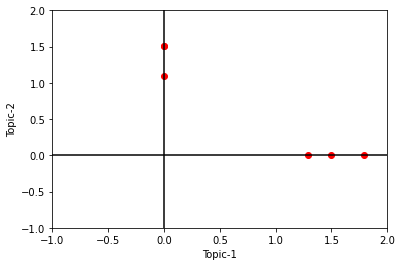

In [ ]:
v0 = TruncatedDTM[:,0]
v1 = TruncatedDTM[:,1]
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
print()
plt.xlim([-1, 2])
plt.ylim([-1, 2])
ax.scatter(list(np.abs(v0)),list(np.abs(v1)),color='red')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.xlabel("Topic-1")
plt.ylabel("Topic-2")
plt.show()

In [ ]:
TruncatedDTM = TruncatedDTM/np.linalg.norm(TruncatedDTM, axis=1).reshape(-1, 1)
cosine_similarity =  abs(np.dot(np.array(TruncatedDTM), np.array(TruncatedDTM.T)))
print("Cosine Similarity\n",cosine_similarity)
print()
print("Cosine Distance\n",1-cosine_similarity)

Cosine Similarity
 [[1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]]

Cosine Distance
 [[0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]]
